# Workshop Docker

Por que usar docker?
- utilizar o computador da melhor forma possível
- mais moderno e mais leve do que VM
- reaproveita o sistema operacional
- Um concorrente to docker é o podman

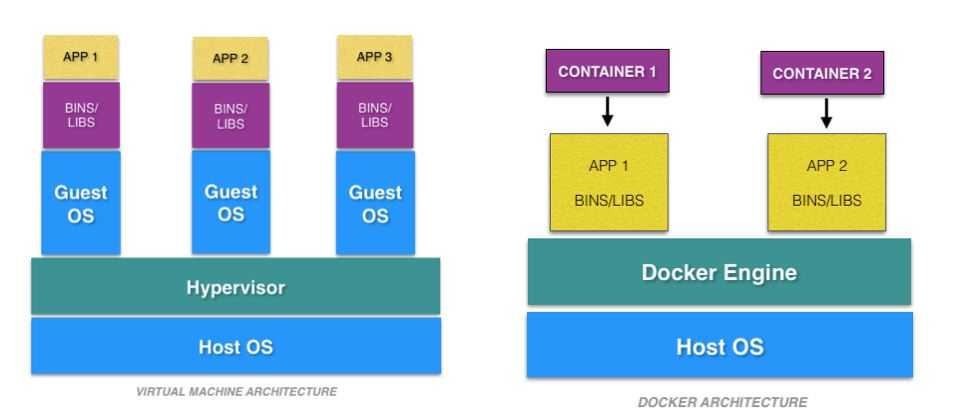

Usar o dockerhub para encontrar uma imagem com o que vc precisa.

A imagem é um build do dockerfile com meu código, porém é basicamente um zip que precisa ser de-zipada no container. É como se a imagem fosse uma classe a o conteiner fosse uma instância dessa classe. Pq eu posso querer ter varias instancias

Para checar a situação das portas pode user netstat -ano | findstr :numerodaporta

Em uma situação de onboarding, basta:
1. clonar o repositório
2. instala docker
3. docker build
4. docker run

Um erro comum é por exemplo desenvolver um dashboard e só pensar no deploy e documentação no último dia, vamos tentar fazer o contrário

Roteiro para usar o docker
- criar dockerfile e configurar o que tem que acontecer no container (FROM, RUN, COPY, WORKDIR, EXPOSE, ENTRYPOINT)
- fazer o docker build -t minha-primeira-imagem . (criar a imagem - faz um zip)
- de-zipa a image com docker run -d -p 8501:8501 --name nomedocontainer nomedaimagem (-d é para deixar o terminal liberado para uso, -p é para as portas do ambiente local e do conteiner apertassem a mão). A partir desse momento está rodando no docker e nao mais na minha máquina, posso inclusive deletar meus arquivos locais q a aplicação ainda funciona

Como colocar na internet?
- podemos usar render ou uma outra cloud como aws. Render é bom pq é simples e de graça
- No render dá pra conectar com o github e deixar em estrutura de CI/CD, basta ligar o auto-deploy e usar PR
- Criar webservice no render e apontar para o repositório github e fazer a build
- na AWS
  - criar instancia (launch instance)
  - seleciona nome e tipo de máquina
  - cria e baixa key pair
  - habilita tráfego HTTP e HTTPS
  - para terminar uma instancia seleciona o ID dela, vai em instance state e terminate (se só parar continua gerando custo, EC2 paga por processamento, paga por hora ligada, S3 é por storage)
  - vai em security groups, edit inboud rules e cria regra nova do tipo customtcp, coloca a porta (8501 no exemplo) e adiciona IP 0.0.0.0/0
  - caso a gente tenha q subir muitas máquinas podemos usar terraform yml para pré-configurar as opções e rodar de uma vez
  - para conectar na instancia vai em connect -> ssh client -> roda o comando na cli de onde baixou a key pair -> roda o outro comando e temos acesso a maquina via bash, porem nao temos nada instalado entao precisamos rodar varios comandos:
    - sudo yum update -y
    - sudo yum install docker -y
    - sudo usermod -a -G docker ec2-user
    - newgrp docker
    - sudo service docker start
    - sudo systemctl enable docker
    - sudo docker run hello-world
    - sudo yum install git -y
    - sudo git clone endereco_do_repositorio
    - cd endereco_do_repositorio
    -  sudo docker build -t nome-da-imagem .
    -  sudo docker run -d -p 8501:8501 --name nome-do-container-aws nome-da-imagem
    -  sudo docker ps (para ver se tem imagem)
  - vai na instancia e abre o public ipv4 address, na URL tira o 's' do https e coloca ':8501' para habilitar a porta
- se a gente mudar o código, o render já dá o re-deploy automaticamente, para aws tem que ir no github actions e criar uma esteira mais informações [aqui](https://lightrains.com/blogs/deploy-aws-ec2-using-github-actions/)




## parte 2

POdemos rodar uma imagem do postgres com:
- docker pull postgres
- docker run --name some-postgres -e POSTGRES_PASSWORD=mysecretpassword -d postgres

Usamos o docker compose quando queremos gerar mais de uma imagem, por exemplo uma para frontend, outra para backend e outra ainda para o banco

criamos um volume para o banco pois queremos persistir os dados, mesmo que a gente delete o container

Para estudar uma determinada biblioteca podemos simplesmente baixar a imagem do docker hub e rodar, ao inves de instalar localmente
    
